In [1]:
import numpy as np
import pandas as pd

# read return information
df = pd.read_csv('stocks.csv')[['ticker','date','ret']]

# cut the date to year month
df.date = df.date//100

# keep only recent 10 years
df = df[df.date>201000]

# change return to percentage points
df['ret'] = df['ret']*100

# number of stocks in our data
n = 28

In [2]:
# below code to re-construct the data from long form to short form
sample = []
for stock in set(df.ticker):
        x = df[df.ticker==stock].set_index('date').dropna()
        if len(x)>120:
            sample.append(x[['ret']].rename({'ret':stock},axis=1))

df = pd.concat(sample,axis=1)

In [3]:
# initiate equally weighted portfolio
w = [1/n]*n

$ w^t \times V \times w \$

In [4]:
# portfolio variance/std
std = df.mul(w,axis=1).sum(axis=1).std()*np.sqrt(12)
# portfolio return
ret = df.mul(w,axis=1).sum(axis=1).mean()*12

In [5]:
# generate random weights (between 0 and 1) and re-weight them so that total weight=1
w = np.random.rand(n)
w = w / w.sum()

In [6]:
# import math library to solve functions (like solver in Excel)
from scipy.optimize import minimize

##### the idea is that, for certain returns, we need to find the portfolio with the lowest variance

In [7]:
rf = 1

In [8]:
def std(w):
    std = df.mul(w,axis=1).sum(axis=1).std()*np.sqrt(12)
    return std

In [14]:
save_result = []
for target_return in range(7,80,3):
    print(f"getting MVP for return of {target_return}")
    res = minimize(std, # this is the function to minimise
         w, # initial weights, I set to random weights to begin with
         bounds=[(-1,3)]*n, # bounds of weights, I set between -1 and 3
         constraints=[# a list of constraints to we need to set
             # each constraint is a dict, the "fun" define a function equal to 0, 
             # below fun defines that the weight need sum to 1
             {"type":"eq","fun":lambda w:w.sum()-1}, 
             # below fun defines that return need to be equal to target return
             {"type":"eq","fun":lambda w:df.mul(w,axis=1).sum(axis=1).mean()*12-target_return},
         ]
        )
    save_result.append([res.fun,target_return])

getting MVP for return of 7
getting MVP for return of 10
getting MVP for return of 13
getting MVP for return of 16
getting MVP for return of 19
getting MVP for return of 22
getting MVP for return of 25
getting MVP for return of 28
getting MVP for return of 31
getting MVP for return of 34
getting MVP for return of 37
getting MVP for return of 40
getting MVP for return of 43
getting MVP for return of 46
getting MVP for return of 49
getting MVP for return of 52
getting MVP for return of 55
getting MVP for return of 58
getting MVP for return of 61
getting MVP for return of 64
getting MVP for return of 67
getting MVP for return of 70
getting MVP for return of 73
getting MVP for return of 76
getting MVP for return of 79


<AxesSubplot:xlabel='std'>

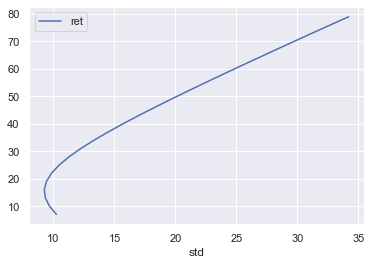

In [15]:
# build the dataframe of std and ret and plot efficient frontier
pd.DataFrame(save_result,columns=['std','ret']).plot(x='std',y='ret')

In [16]:
def sharpe(w):
    std = df.mul(w,axis=1).sum(axis=1).std()*np.sqrt(12)
    ret = df.mul(w,axis=1).sum(axis=1).mean()*12
    # return negative sharpe ratio, so that we can minimize it (equavalent to maxing sharpe ratio)
    return -(ret-rf)/std

In [17]:
res = minimize(sharpe, # this is the function to minimise
         w, # initial weights, I set to random weights to begin with
         bounds=[(-1,3)]*n, # bounds of weights, I set between -1 and 3
         constraints=[# a list of constraints to we need to set
             {"type":"eq","fun":lambda w:w.sum()-1}, 
             # each constraint is a dict, the "fun" define a function equal to 0, 
             # the weight sum to 1 in this case
         ]
        )

<AxesSubplot:xlabel='std_risky'>

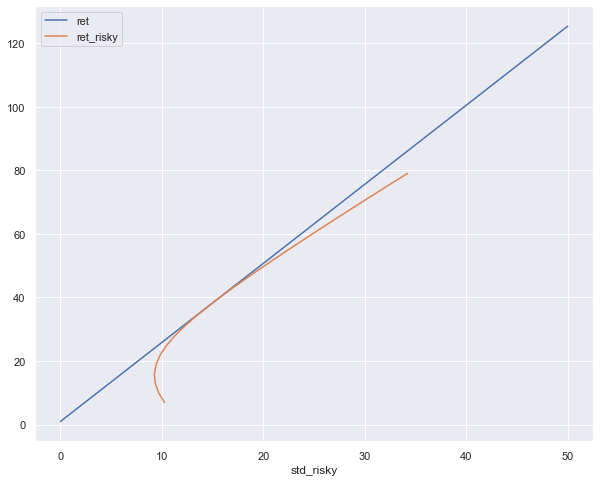

In [22]:
ax = pd.DataFrame([[0,rf],[50,rf-res.fun*50]],columns=['std','ret']).plot(x='std',y='ret',figsize=(10,8))
pd.DataFrame(save_result,columns=['std_risky','ret_risky']).plot(x='std_risky',y='ret_risky',ax=ax)